In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from thinkdsp import read_wave, Spectrum, Wave, Noise

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

sound_file = read_wave('4.1.wav')
sound_segment = sound_file.segment(start=2, duration=3.0)
sound_segment.make_audio()

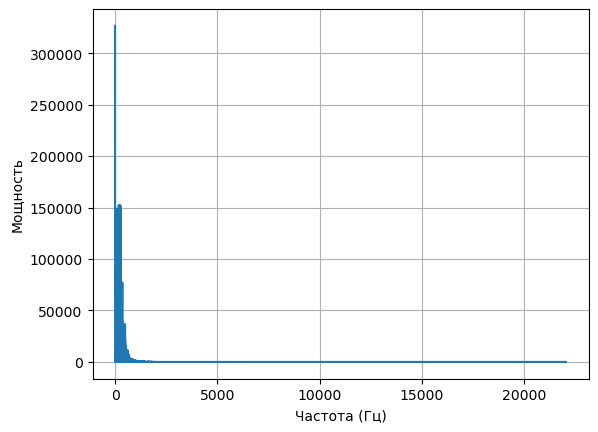

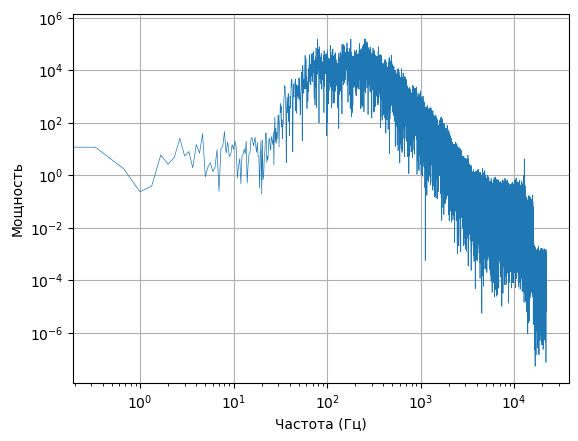

C:\Users\PC\PythonProjects\ThinkDSP\code\thinkdsp.py:1112: RuntimeWarning: overflow encountered in scalar absolute
  high, low = abs(max(ys)), abs(min(ys))


In [2]:
freq_profile = sound_segment.make_spectrum()
freq_profile.plot_power()
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

freq_profile.plot_power(linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

storm_sound = read_wave('4.2.wav')
storm_segment = storm_sound.segment(start=3.0, duration=3.0)
storm_segment.make_audio()

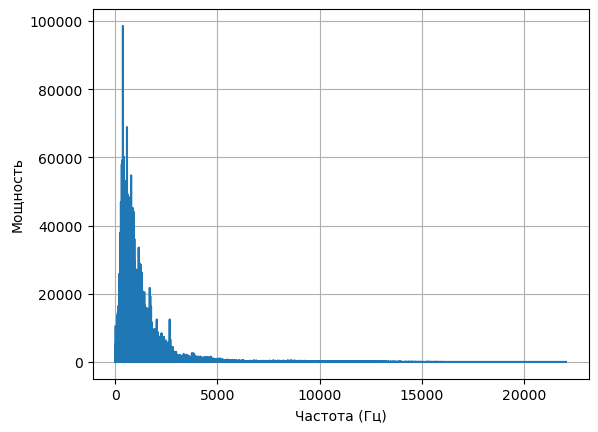

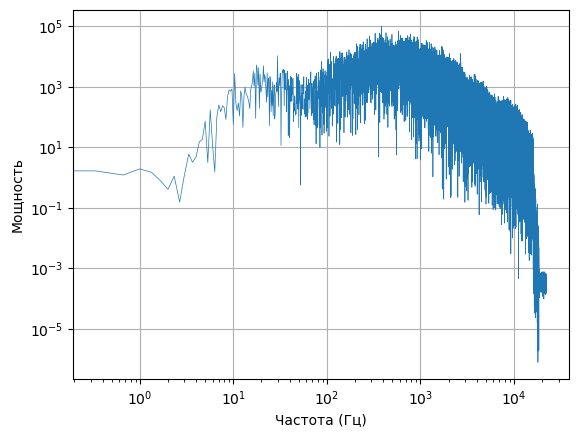

In [3]:
storm_spectrum = storm_segment.make_spectrum()
storm_spectrum.plot_power()
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

storm_spectrum.plot_power(linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

wind_sound = read_wave('4.3.wav')
wind_sound.make_audio()

In [4]:
wind_segment = wind_sound.segment(start=0, duration=3.0)
wind_segment.make_audio()

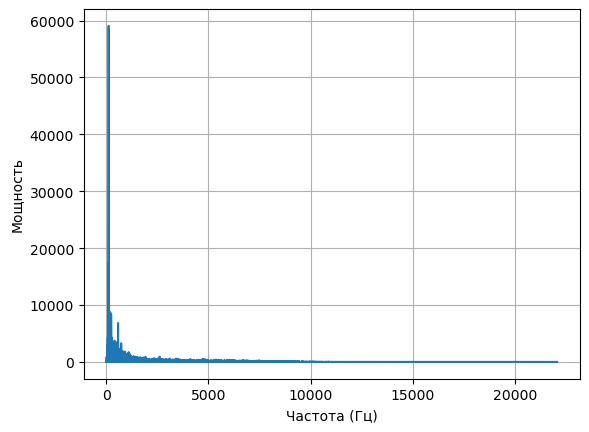

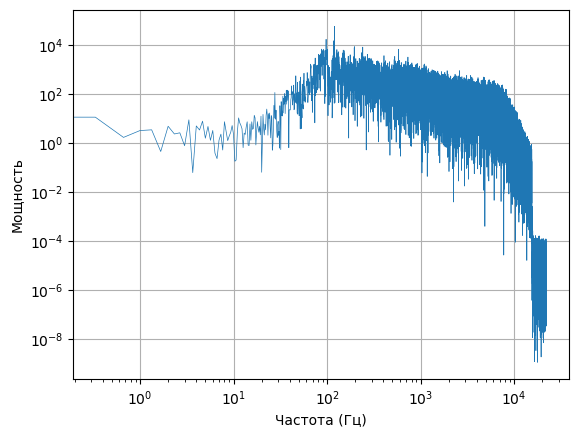

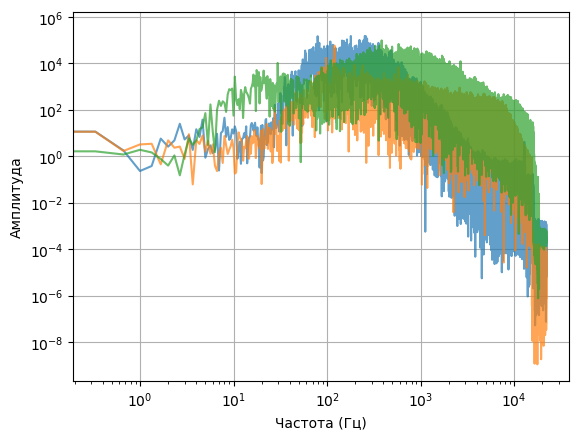

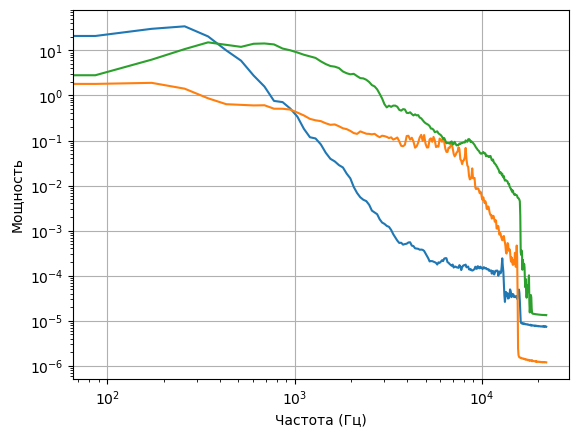

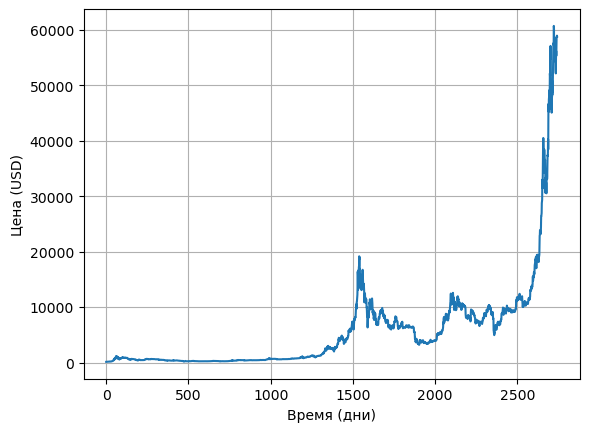

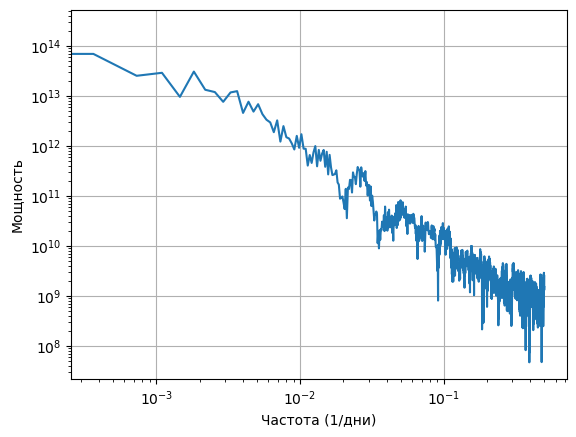

In [5]:
wind_spectrum = wind_segment.make_spectrum()
wind_spectrum.plot_power()
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

wind_spectrum.plot_power(linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

freq_profile.plot_power(alpha=0.7)
wind_spectrum.plot_power(alpha=0.7)
storm_spectrum.plot_power(alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

def calculate_mean_power(audio_wave, seg_size=512, use_filter=True):
    spectrogram_result = audio_wave.make_spectrogram(seg_size, use_filter)
    spec_list = list(spectrogram_result.spec_map.values())
    energy_values = [spec.power for spec in spec_list]
    avg_energy = np.sqrt(sum(energy_values) / len(energy_values))
    freq_points = spec_list[0].fs
    return Spectrum(avg_energy, freq_points, audio_wave.framerate)

energy_spec1 = calculate_mean_power(sound_segment)
energy_spec2 = calculate_mean_power(wind_segment)
energy_spec3 = calculate_mean_power(storm_segment)

energy_spec1.plot_power()
energy_spec2.plot_power()
energy_spec3.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

market_data = pd.read_csv('Bitcoin.csv')
price_values = market_data['Closing Price (USD)']
time_steps = market_data.index
price_signal = Wave(price_values, time_steps, framerate=1)
price_signal.plot()
plt.xlabel('Время (дни)')
plt.ylabel('Цена (USD)')
plt.grid(True)
plt.show()

price_freq = price_signal.make_spectrum()
price_freq.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (1/дни)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

class UncorrelatedPoissonNoise(Noise):
    def evaluate(self, ts):
        amplitudes = np.random.poisson(self.amp, len(ts))
        return amplitudes

noise_source = UncorrelatedPoissonNoise(amp=0.001)
noise_signal = noise_source.make_wave(duration=2, framerate=10000)
noise_signal.make_audio()

20.0 19


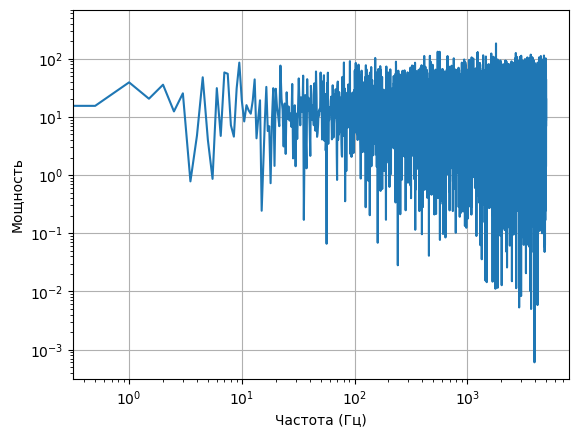

C:\Users\PC\AppData\Local\Temp\ipykernel_11508\2605613514.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=0, inplace=True)


In [6]:
expected_total = 0.001 * 10000 * 2
actual_total = np.sum(noise_signal.ys)
print(expected_total, actual_total)
noise_freq = noise_signal.make_spectrum()
noise_freq.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

noise_freq.estimate_slope().slope

def build_noise_grid(row_num, col_num=16):
    grid = np.full((row_num, col_num), np.nan)
    grid[0, :] = np.random.uniform(size=col_num)
    grid[:, 0] = np.random.uniform(size=row_num)
    steps = row_num
    col_steps = np.random.geometric(0.5, steps)
    col_steps[col_steps >= col_num] = 0
    row_steps = np.random.randint(row_num, size=steps)
    grid[row_steps, col_steps] = np.random.uniform(size=steps)
    df = pd.DataFrame(grid)
    df.fillna(method='ffill', axis=0, inplace=True)
    output = df.sum(axis=1).values
    return output

noise_sequence = build_noise_grid(11025)
noise_track = Wave(noise_sequence)
noise_track.unbias()
noise_track.normalize()
noise_track.make_audio()

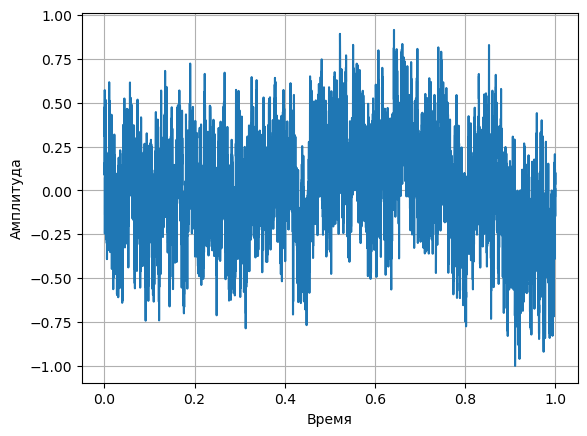

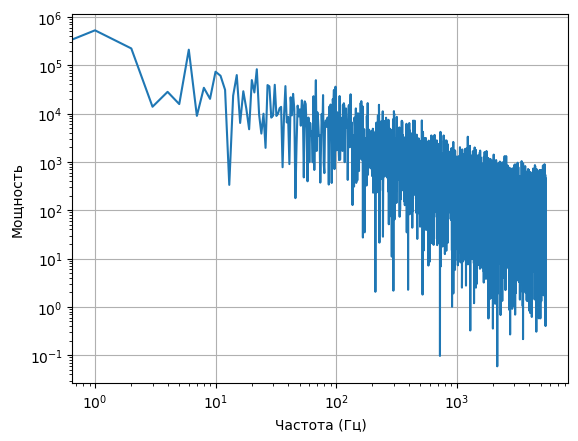

-0.9685545758576724

In [7]:
noise_track.plot()
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

noise_profile = noise_track.make_spectrum()
noise_profile.hs[0] = 0
noise_profile.plot_power()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Мощность')
plt.grid(True)
plt.show()

noise_profile.estimate_slope().slope